# Plotting scripts

----
Copyright (C) 2019  M.A. Gilles

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this program.  If not, see <http://www.gnu.org/licenses/>.

----

The primary purpose in distributing this source code is to enable readers to reproduce the numerical  results reported in the manuscript "Surveillance-Evasion Games under Uncertainty" by M.A. Gilles and A. Vladimirsky. See <https://arxiv.org/abs/1812.10620>.

The code can be found at <https://github.com/eikonal-equation/Stationary_SEG>.
Please see README.md for instructions on configuring/running this program.


File: PlotNashSingleTarget

Author: Marc Aurèle Gilles

Description: This plots loads the data and produces plots of the Nash equilibrium of the E-O game when all the evaders have the same target (or there is a single evader). This script should be used to visualize figure 3, 4, 5, 6, 9 and 10.


In [6]:
#Set the name here.
name = 'FigureSix';

In [13]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
import os
outputfolder = '../output/' + name;
fdtype = np.dtype('f8');
SavingToFile = False;

In [14]:
## Loads all data corresponding to the file name defined in the above cell.
def LoadData():    
    source = np.fromfile(outputfolder + 'Sources', fdtype );
    source = source.reshape([int(source.shape[0]/2), 2]);
    target = np.fromfile(outputfolder + 'Target', fdtype );
    observers = np.fromfile(outputfolder + 'Observers', fdtype );
    observers = observers.reshape([int(observers.shape[0]/2), 2]);
    
    u =  np.fromfile(outputfolder + 'CombinedValue', fdtype );
    u = np.transpose(u.reshape(int(np.sqrt(u.size)),int(np.sqrt(u.size)) ))
    Klambda =   np.transpose(np.fromfile(outputfolder + 'CombinedCost', fdtype ).reshape(u.shape[0],u.shape[1]));
    u[ u > 1e8 ] = np.inf;
    vi = np.zeros([observers.shape[0], u.shape[0],u.shape[1]])
    Ki = np.zeros([observers.shape[0], u.shape[0],u.shape[1]])
    path = [];
    for k in range(0,observers.shape[0]):
        if os.path.exists(outputfolder + 'Obs'+ str(k) + 'Value' ):
            vi[k,:,:] = np.transpose(np.fromfile(outputfolder + 'Obs'+ str(k) + 'Value', fdtype ).reshape(u.shape[0],u.shape[1]));
            Ki[k,:,:] = np.transpose(np.fromfile(outputfolder + 'Obs'+ str(k) + 'Cost', fdtype ).reshape(u.shape[0],u.shape[1]));

    vi[ vi > 1e8 ] = np.inf;
                        
    costs = np.fromfile(outputfolder+'Costs', fdtype);
    costs = costs.reshape( int(costs.size/(observers.shape[0] + 1)), observers.shape[0] + 1);
    probs = np.fromfile(outputfolder+'Probabilities', fdtype);
    probs = probs.reshape( int(probs.size/observers.shape[0]), observers.shape[0]);
    theta = np.fromfile(outputfolder+'Theta',fdtype);
    for k in range(0,theta.shape[0]):
        if os.path.exists(outputfolder + 'path'+ str(k)+'E0' ):
            p = np.fromfile(outputfolder + 'path'+ str(k)+'E0', fdtype );
            path.append( p.reshape(int(p.shape[0]/2),2));

  
    return source, target, observers, u , Klambda, vi, Ki, path, costs, probs, theta
        

# Load all data

In [16]:
[source, target, observers, u, Klambda, vi, Ki,path, costs, probs, theta] = LoadData()
lambd = probs[0,:];
lambd_I = lambd[lambd>0];
nonzeroprobs = lambd.shape[0]
nObservers = observers.shape[0];
print('Lambda:', lambd)
print('Theta:',theta)
print('Costs: ',costs)
A = np.matrix(costs[:,:-1]);


Lambda: [ 0.39274194  0.60725806]
Theta: [ 0.65397156  0.34602844]
Costs:  [[-1.66008819 -3.52748296 -2.80146159]
 [-4.93948966 -1.41146567 -2.80128712]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


In [17]:
A = np.matrix(costs[:,:-1]);
Asm = np.matrix(costs[:,lambd>0]);
while A[-1,-1] == 0:
    A = A[:-1,:];
    Asm = Asm[:-1,:];
Glambda = np.sum(np.squeeze(np.dot(A[0,:],lambd)))
res = np.linalg.norm(np.dot(theta,Asm) - np.ones([1,Asm.shape[1]])*Glambda);
lambd_costs = np.linalg.norm(np.dot(lambd,np.transpose(A)) - np.ones([A.shape[0],1])*Glambda);
namebig = name + 'Big';
print('Observer\'s regret:',np.linalg.norm(res)/np.abs(Glambda)/nonzeroprobs)
print('Evader\'s regret:', np.max(abs(lambd_costs/costs[0,-1])))


Observer's regret: 0.000256006621006
Evader's regret: 0.00150935892769


/Users/mtg79/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 3 but corresponding boolean dimension is 2
  from ipykernel import kernelapp as app


# Plot solution and paths computed

/Users/mtg79/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:55: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


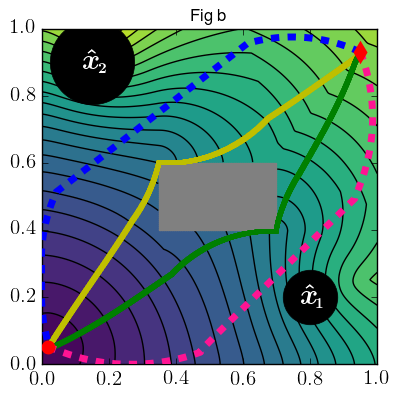

In [20]:
from cycler import cycler
from matplotlib import rc

figu = plt.figure();
nx = u.shape[0];
ny = u.shape[1];
xcoor = np.linspace(0,1,nx);
ycoor = np.linspace(0,1,ny);
plt.set_cmap('viridis')

##Find pixels in obstacles
lx = [];
ly = [];
for i in range(len(u)):
    for j in range(len(u[0])):
        if u[i][j] == np.inf:
            lx.append(i);
            ly.append(j);
plt.contour(np.linspace(0,1,nx),  np.linspace(0,1,ny), u, 30,colors=('k'))
plt.contourf(  np.linspace(0,1,nx),  np.linspace(0,1,ny), u, 30,linestyles = 'solid');

## plot pixels in obstacles separately
plt.plot(xcoor[ly], ycoor[lx], 'o',color = 'gray', markersize=1,  markeredgecolor = 'none')

for k in range(source.shape[0]):
   plt.plot(source[k][0], source[k][1],marker='d',mfc='red',mec = 'red',markersize=5,mew=5,zorder = 45)

plt.plot(target[0], target[1],marker='o',mfc='red',mec = 'red',markersize=5,mew=5,zorder = 45)

#plot observer positions
for k in range(observers.shape[0]):
    x_string = r'$\boldsymbol{\hat{x}}$';
    int_string = r'$\boldsymbol{'+str(k+1)+'}$';
    plt.text(observers[k,0], observers[k,1], x_string ,ha='center', va='center', fontsize=20,color='white' )
    plt.text(observers[k,0]+0.03, observers[k,1]-0.02, int_string,ha='center', va='center', fontsize=11,color='white',zorder =5 )
    if lambd[k] > 0:
        plt.plot(observers[k,0], observers[k,1], 'o', markersize=100*lambd[k], mec = 'k', mfc = 'k' )


#
pathcolors = ['deeppink','b','y','g','gray','c'];
pc = 0;
k = 0;
while os.path.exists(outputfolder + 'PathPure'+ str(k)+'E0' ):
    purepath =  np.fromfile(outputfolder + 'PathPure'+ str(k)+'E0', fdtype );
    purepath = purepath.reshape(int(purepath.size/2), 2) ;
    plt.plot(purepath[:,0], purepath[:,1],'--', color = pathcolors[pc],linewidth = 5,zorder = 44)
    k = k+1;
    pc = pc + 1;

    

plt.rc('axes', prop_cycle=(cycler('color', ['b', 'g', 'c','m','y'])))
for k in range(len(path)):
    if path[k] == []:
        continue;
    plt.plot(path[k][:,0], path[k][:,1],marker='.',color = pathcolors[pc%len(pathcolors)])
    pc = pc + 1;

    
plt.tight_layout()
plt.axis('tight')
plt.axis('equal')
plt.axis('image')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.title('Fig b')
if SavingToFile:
    plt.savefig('../manuscript/fig/'+name+'Sol.png', format='png',transparent = True, bbox_inches = 'tight', pad_inches = 0)

plt.show()